<a href="https://colab.research.google.com/github/girardi69/python/blob/main/Prodotti_p_per_q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clonare il repository tvdatafeed
!git clone https://github.com/rongardF/tvdatafeed.git

# Spostarsi nella directory e installare la libreria
%cd tvdatafeed
!pip install .


fatal: destination path 'tvdatafeed' already exists and is not an empty directory.
/content/tvdatafeed
Processing /content/tvdatafeed
  Preparing metadata (setup.py) ... done
  Created wheel for tvdatafeed: filename=tvdatafeed-2.1.0-py3-none-any.whl size=17532 sha256=922a3b882598a63f834828f936e326b8f5a41f3f21583ca62605515b5b369788
  Stored in directory: /tmp/pip-ephem-wheel-cache-ywd6y9qt/wheels/21/b3/77/2e963e196f76ed7938e373dea32e8588de8ab6e9f421af1cfb
Successfully built tvdatafeed
  Attempting uninstall: tvdatafeed
    Found existing installation: tvdatafeed 2.1.0
    Uninstalling tvdatafeed-2.1.0:
      Successfully uninstalled tvdatafeed-2.1.0


In [2]:
# @title

!pip install mplcursors


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors  # <-- aggiunto per il tooltip
from tvDatafeed import TvDatafeed, Interval

# Connessione a TradingView (username e password opzionali per un account premium)
tv = TvDatafeed(username=None, password=None)

In [7]:
# prompt: scarica con TVDataFeed gli ultimi dieci valori giornalieri di TSLA e AAPL e inseriscili in un dataframe df

import pandas as pd
# Scarica i dati da TradingView
giorni = 20
df_nflx = tv.get_hist(symbol='NFLX', exchange='NASDAQ', interval=Interval.in_daily, n_bars=giorni)
df_nvda = tv.get_hist(symbol='NVDA', exchange='NASDAQ', interval=Interval.in_daily, n_bars=giorni)
df_tsla = tv.get_hist(symbol='TSLA', exchange='NASDAQ', interval=Interval.in_daily, n_bars=giorni)
df_msft = tv.get_hist(symbol='MSFT', exchange='NASDAQ', interval=Interval.in_daily, n_bars=giorni)
df_lly = tv.get_hist(symbol='LLY', exchange='NYSE', interval=Interval.in_daily, n_bars=giorni)

# Crea un nuovo DataFrame con i dati delle azioni
df = pd.DataFrame()

# Aggiunge le colonne per TSLA e AAPL al DataFrame
df['NFLX'] = df_nflx['close']
df['NVDA'] = df_nvda['close']
df['TSLA'] = df_tsla['close']
df['MSFT'] = df_msft['close']
df['LLY'] = df_lly['close']

# Stampa il DataFrame
df


,NFLX,NVDA,TSLA,MSFT,LLY
datetime,,,,,
2025-03-28 13:30:00,933.85,109.67,263.55,378.80,822.51
2025-03-31 13:30:00,932.53,108.38,259.16,375.39,825.91
2025-04-01 13:30:00,928.38,110.15,268.46,382.19,805.23
2025-04-02 13:30:00,935.52,110.42,282.76,382.14,818.22
2025-04-03 13:30:00,917.05,101.80,267.28,373.11,789.09
2025-04-04 13:30:00,855.86,94.31,239.43,359.84,738.21
2025-04-07 13:30:00,867.83,97.64,233.29,357.86,723.73
2025-04-08 13:30:00,870.40,96.30,221.86,354.56,726.24
2025-04-09 13:30:00,945.47,114.33,272.20,390.49,753.71


In [8]:
# prompt: crea una tupla di quantità TSLA=100 e AAPL=150 e moltiplica le quantità con i valori assunti giorno per giorno. Aggiungi in un'ultima colonna la somma totale

# Crea la tupla di quantità
quantita = {'NFLX': 140, 'NVDA': 950, 'TSLA': 376, 'MSFT': 90,'LLY': 40}

# Crea nuove colonne per le quantità moltiplicate per i prezzi
for symbol, qty in quantita.items():
    df[f'{symbol}_val'] = df[symbol] * qty

# Crea la colonna per la somma totale
df['Total'] = df['NFLX_val'] + df['NVDA_val'] + df['TSLA_val'] + df['MSFT_val'] + df['LLY_val']

# Stampa il DataFrame aggiornato
df


,NFLX,NVDA,TSLA,MSFT,LLY,NFLX_val,NVDA_val,TSLA_val,MSFT_val,LLY_val,Total
datetime,,,,,,,,,,,
2025-03-28 13:30:00,933.85,109.67,263.55,378.80,822.51,130739.0,104186.5,99094.80,34092.0,32900.4,401012.70
2025-03-31 13:30:00,932.53,108.38,259.16,375.39,825.91,130554.2,102961.0,97444.16,33785.1,33036.4,397780.86
2025-04-01 13:30:00,928.38,110.15,268.46,382.19,805.23,129973.2,104642.5,100940.96,34397.1,32209.2,402162.96
2025-04-02 13:30:00,935.52,110.42,282.76,382.14,818.22,130972.8,104899.0,106317.76,34392.6,32728.8,409310.96
2025-04-03 13:30:00,917.05,101.80,267.28,373.11,789.09,128387.0,96710.0,100497.28,33579.9,31563.6,390737.78
2025-04-04 13:30:00,855.86,94.31,239.43,359.84,738.21,119820.4,89594.5,90025.68,32385.6,29528.4,361354.58
2025-04-07 13:30:00,867.83,97.64,233.29,357.86,723.73,121496.2,92758.0,87717.04,32207.4,28949.2,363127.84
2025-04-08 13:30:00,870.40,96.30,221.86,354.56,726.24,121856.0,91485.0,83419.36,31910.4,29049.6,357720.36
2025-04-09 13:30:00,945.47,114.33,272.20,390.49,753.71,132365.8,108613.5,102347.20,35144.1,30148.4,408619.00


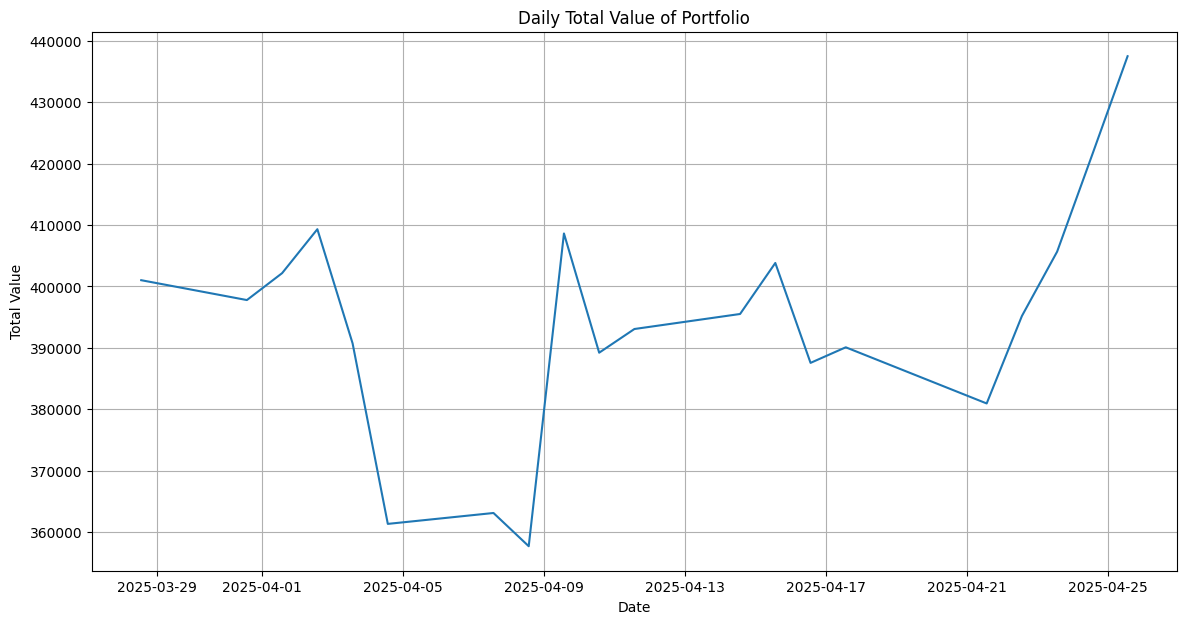

In [11]:
# prompt: plot the daily value of the column total

import matplotlib.pyplot as plt
# Plot the daily value of the 'Total' column
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Total'])
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.title('Daily Total Value of Portfolio')
mplcursors.cursor(hover=True) # Enable tooltips on hover
plt.grid(True)
plt.show()
